<a href="https://colab.research.google.com/github/Redzoro1993/GPDistance/blob/master/ProyectoMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1


In [1]:
import numpy as np
x=100 #Precio del activo financiero
ds= 0.25 #Cambio en el precio del activo financiero
Estados = ["-4 Ticks", "-3 Ticks", "-2 Ticks","-1 Ticks","0 Ticks",
           "1 Ticks","2 Ticks","3 Ticks","4 Ticks"]
S = np.array ([x-ds*4,x-ds*3,x-ds*2,x-ds*1,x+ds*0,x+ds*1,x+ds*2,x+ds*3,x+ds*4])
N = 50 #Tiempos a simular
SL = x-ds*2 #Stoploss
TP = x+ds*3 #Takeprofit
Pi = [[0.3,0.7,0,0,0,0,0,0,0],
      [0.3,0,0.5,0.2,0,0,0,0,0],
      [0,0.25,0,0.7,0.05,0,0,0,0],
      [0,0.05,0.4,0,0.55,0,0,0,0],
      [0,0,0,0.15,0,0.35,0.5,0,0],
      [0,0,0,0.05,0.5,0,0.45,0,0],
      [0,0,0,0,0,0.2,0,0.6,0.2],
      [0,0,0,0,0,0.1,0.3,0,0.6],
      [0,0,0,0,0,0,0.5,0.5,0]]
Xn = [0]*N
beta = np.array([0,0,0,0,1,0,0,0,0])
Xn[0] = np.random.choice (S,p=beta)
i=0
ind = np.where(S == Xn[i])[0][0]
Xn[i+1]=np.random.choice(S,p=Pi[ind])
def RealizacionCadenaMarkov (S,Pi,N,beta):
    Xn[0] = np.random.choice (S,p=beta)
    for i in range (N-1):
        ind = np.where(S==Xn[i]) [0] [0]
        Xn[i+1] = np.random.choice(S,p=Pi[ind])
    return Xn

# Punto 2

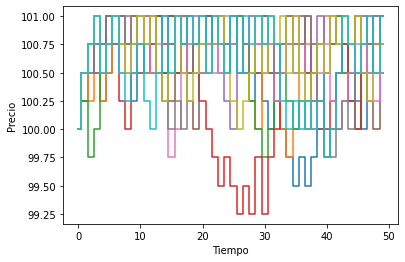

In [2]:
import matplotlib.pyplot as plt
M = 10
for i in range (M):
  Xn = RealizacionCadenaMarkov(S,Pi,N,beta)
  plt.step(np.arange(0,N),Xn,where="mid")
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.show()

# Punto 3

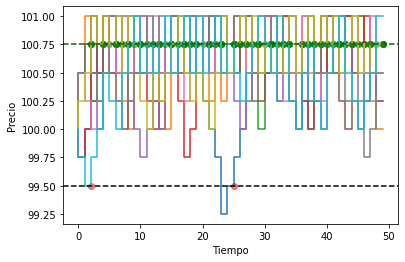

In [3]:
import matplotlib.pyplot as plt
M = 10
for i in range(M):
    Xn = RealizacionCadenaMarkov(S,Pi,N,beta)
    Xn_2 = Xn * M
    
    PFSL = [i for i, e in enumerate(Xn,0)  if e == SL]
    FSL= [i for i, e in enumerate(Xn,0)  if e == SL]
    v_0 = np.zeros(len(PFSL))
    FSL2 = [SL if x==0 else x for x in v_0]
    plt.plot(PFSL,FSL2,"ro",alpha = 0.5)
    
    PFTP = [i for i, e in enumerate(Xn,0)  if e == TP]
    FTP= [i for i, e in enumerate(Xn,0)  if e == TP]
    v2_0 = np.zeros(len(PFTP))
    FTP2 = [TP if x==0 else x for x in v2_0]
    plt.plot(PFTP,FTP2,"go",alpha = 0.5)
   
    plt.step(np.arange(0,N),Xn)
plt.axhline(y=SL, color='Black', linestyle='--',alpha=5,label="horizontal")
plt.axhline(y=TP, color='Darkgreen', linestyle='--',alpha=10)
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.show()

In [4]:
from collections import Counter


In [5]:
print(Counter(Xn_2),"Total",len(Xn_2))

Counter({100.5: 150, 100.75: 110, 101.0: 90, 100.0: 60, 100.25: 60, 99.75: 20, 99.5: 10}) Total 500


In [6]:
NSL = Xn_2.count(SL)
NTP = Xn_2.count(TP)
print("El número de puntos que pasa por stoploss y takeprofit es:", NSL,NTP)

El número de puntos que pasa por stoploss y takeprofit es: 10 110


# Punto 4

In [7]:
import pandas as pd
M = 100000
Results = [0] * M
for i in range (M):
  Results[i] = RealizacionCadenaMarkov (S,Pi,N,beta ) [-1]
beta1 = [0] * len (S)
for i in range (len(S)):
  beta1 [i] = float ((Results == S[i]).sum())/M
print (beta1)
d = {'Probabilidades' : pd.Series(beta1, index=Estados)}
pd.DataFrame(d)

[0.00307, 0.00693, 0.01484, 0.02721, 0.06872, 0.10734, 0.276, 0.2764, 0.21949]


,Probabilidades
-4 Ticks,0.00307
-3 Ticks,0.00693
-2 Ticks,0.01484
-1 Ticks,0.02721
0 Ticks,0.06872
1 Ticks,0.10734
2 Ticks,0.27600
3 Ticks,0.27640
4 Ticks,0.21949


# Punto 5

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('markovchain')

In [ ]:
%%R
library(markovchain)

In [15]:
%%R
Pi = matrix(c(0.3,0.7,0,0,0,0,0,0,0,
      0.3,0,0.5,0.2,0,0,0,0,0,
      0,0.25,0,0.7,0.05,0,0,0,0,
      0,0.05,0.4,0,0.55,0,0,0,0,
      0,0,0,0.15,0,0.35,0.5,0,0,
      0,0,0,0.05,0.5,0,0.45,0,0,
      0,0,0,0,0,0.2,0,0.6,0.2,
      0,0,0,0,0,0.1,0.3,0,0.6,
      0,0,0,0,0,0,0.5,0.5,0),nrow = 9,byrow = TRUE)
estados=c("-4 Ticks", "-3 Ticks", "-2 Ticks","-1 Ticks","0 Ticks",
           "1 Ticks","2 Ticks","3 Ticks","4 Ticks")
mc = new("markovchain",transitionMatrix=Pi,states=estados,name="Cadena 1")
MFPT_TP= meanFirstPassageTime(mc,"3 Ticks")
MFPT_SL= meanFirstPassageTime(mc,"-2 Ticks")

In [17]:
%R -o MFPT_SL -o MFPT_TP 
MFPT2 = MFPT_SL.astype(int)
MFPT3 = MFPT_TP.astype(int)
TP = {'Tiempo Esperado' : pd.Series(MFPT3, index=["-4 Ticks","-3 Ticks","-2 Ticks","-1 Ticks","0 Ticks","1 Ticks","2 Ticks","4 Ticks"])}
pd.DataFrame(TP)

,Tiempo Esperado
-4 Ticks,13
-3 Ticks,11
-2 Ticks,10
-1 Ticks,8
0 Ticks,5
1 Ticks,5
2 Ticks,2
4 Ticks,2


In [18]:
SL = {'Tiempo Esperado' : pd.Series(MFPT2, index=["-4 Ticks","-3 Ticks","-1 Ticks","0 Ticks","1 Ticks","2 Ticks","3 Ticks","4 Ticks"])}
pd.DataFrame(SL)

,Tiempo Esperado
-4 Ticks,25
-3 Ticks,24
-1 Ticks,78
0 Ticks,138
1 Ticks,142
2 Ticks,152
3 Ticks,153
4 Ticks,153
